In [ ]:
#import pandas library for data manipulation
import pandas as pd 

#store file path in a variable

file_path = (r"C:\Users\sadmin\OneDrive\Desktop\PROJECT WORK CERVICAL CANCER\Cervical Cancer Data.xlsx")

#read each work sheet so i can work on it differently

Pre_df = pd.read_excel(file_path, sheet_name = 'Pretest')
Post_df = pd.read_excel(file_path, sheet_name = 'Post Test')
cc_df = pd.read_excel(file_path, sheet_name = 'CC Study')


Pre_df.head() #display first 5 rows of the pretest dataframe
Post_df.head() #display first 5 rows of the posttest dataframe
cc_df.head() #display first 5 rows of the cervical cancer dataframe


Pre_df.shape #check the shape of the pretest dataframe
Post_df.shape #check the shape of the posttest dataframe   
cc_df.shape #check the shape of the cervical cancer dataframe






(2383, 34)

In [ ]:
# Step 2: Compare student IDs between Pretest and Post Test

# Extract unique IDs from each dataset
Pre_ids = set(Pre_df['AutoID'])
Post_ids = set(Post_df['AutoID'])

# Find overlaps and differences
common_ids = Pre_ids.intersection(Post_ids)
Only_Pre = Pre_ids - Post_ids
Only_Post = Post_ids - Pre_ids

# Print summary results
print(f" Total Pre-test students: {len(Pre_ids)}")
print(f" Total Post-test students: {len(Post_ids)}")
print(f" Students who took both tests: {len(common_ids)}")
print(f" Students only in Pre-test: {len(Only_Pre)}")
print(f" Students only in Post-test: {len(Only_Post)}")



 Total Pre-test students: 1107
 Total Post-test students: 1276
 Students who took both tests: 1107
 Students only in Pre-test: 0
 Students only in Post-test: 169


In [11]:
# Step 3: Check age consistency for students who took both tests

# Select only the common students and their ages
pre_common = Pre_df[Pre_df['AutoID'].isin(common_ids)][['AutoID', 'age']]
post_common = Post_df[Post_df['AutoID'].isin(common_ids)][['AutoID', 'age']]

# Merge by AutoID to compare pre vs post ages
age_check = pre_common.merge(post_common, on='AutoID', suffixes=('_pre', '_post'))

# Calculate age differences
age_check['age_diff'] = age_check['age_post'] - age_check['age_pre']

# Summarize
print(" Total students checked:", len(age_check))
print(" Students with matching ages:", (age_check['age_diff'] == 0).sum())
print(" Students with different ages:", (age_check['age_diff'] != 0).sum())

# View a few mismatches
age_check[age_check['age_diff'] != 0]

age_diff_summary = age_check['age_diff'].value_counts().sort_index()
print(age_diff_summary)

 Total students checked: 1107
 Students with matching ages: 335
 Students with different ages: 772
age_diff
-3      4
-2    118
-1    298
 0    335
 1    218
 2     97
 3     34
 4      3
Name: count, dtype: int64


In [19]:
# Step 4A: Descriptive Analysis - Demographics

# 1️⃣ Check basic info about age, gender, and class columns
print(Pre_df[['age', 'SHS Class']].info())

# 2️⃣ Get summary statistics for age
print("\n Age Summary:")
print(Pre_df['age'].describe())


print("\n SHS Class Distribution:")
print(Pre_df['SHS Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1107 non-null   int64 
 1   SHS Class  1107 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.4+ KB
None

 Age Summary:
count    1107.000000
mean       16.117435
std         0.910425
min        14.000000
25%        15.000000
50%        16.000000
75%        17.000000
max        18.000000
Name: age, dtype: float64

 SHS Class Distribution:
SHS Class
SHS 3    474
SHS 2    429
SHS 1    204
Name: count, dtype: int64


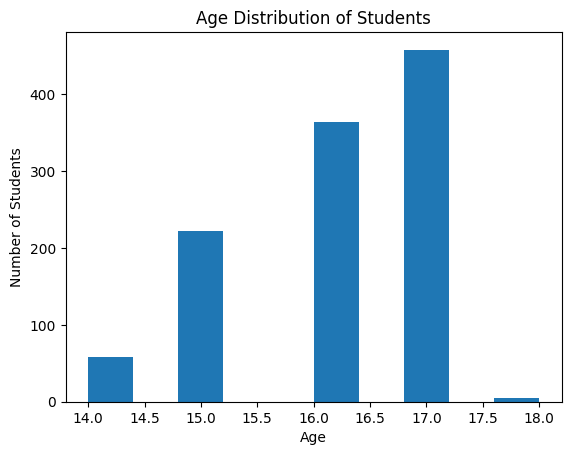

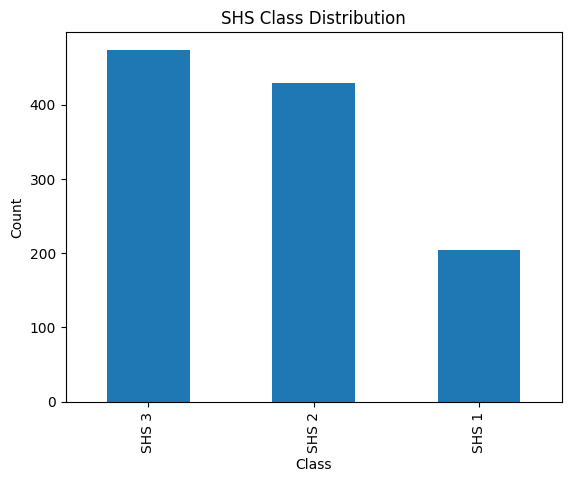

In [17]:
import matplotlib.pyplot as plt

# Age distribution
plt.hist(Pre_df['age'], bins=10)
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()


# SHS class distribution
Pre_df['SHS Class'].value_counts().plot(kind='bar')
plt.title('SHS Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [36]:
# Check all column names in both datasets
print("Pre-test Columns:\n", Pre_df.columns.tolist())
print("\nPost-test Columns:\n", Post_df.columns.tolist())

Pre-test Columns:
 ['Unnamed: 0', 'AutoID', 'StataID', 'Type', 'age', 'SHS Class', 'CC Cause', 'CC Curable', 'CC Not In Women Less 30yrs', 'CC Begins In Cervix', 'Vaginal Bleeding', 'Frequent Urination', 'CCVaginal Discharge', 'Painful Sex', 'Sex At Young Age', 'Many Sexual Partners', 'Sexual Partners With Many Partners', 'Excessive Weight Gain', 'Avoid Smoking', 'HPV Immunization', 'Regular Screen PapSmear', 'Regular Exercise', 'First Pap Smear', 'CC Prevention', 'DomainICat', 'DomainIICat', 'DomainIIICat', 'DomainIVCat', 'DomainOverAllCat', 'DomainI', 'DomainII', 'DomainIII', 'DomainIV', 'DomainOverAll']

Post-test Columns:
 ['Unnamed: 0', 'AutoID', 'StataID', 'Type', 'age', 'SHS Class', 'CCCause', 'CCCurable', 'CCNotInWomenLess30yrs', 'CCBeginsInCervix', 'VaginalBleeding', 'FrequentUrination', 'CCVaginalDischarge', 'PainfulSex', 'SexAtYoungAge', 'ManySexualPartners', 'SexualPartnersWithManyPartners', 'ExcessiveWeightGain', 'AvoidSmoking', 'HPVImmunization', 'RegularScreenPapSmear', 

In [38]:
# Step 4B.2: Compare Pre-test and Post-test Domain Scores

# List of domain score columns
domains = ['DomainI', 'DomainII', 'DomainIII', 'DomainIV', 'DomainOverAll']

# Create summary tables for pre and post test
pre_summary = Pre_df[domains].describe().T
post_summary = Post_df[domains].describe().T

# Combine into one summary table for comparison
comparison = pd.DataFrame({
    'Pre Mean': pre_summary['mean'],
    'Post Mean': post_summary['mean'],
    'Pre Std': pre_summary['std'],
    'Post Std': post_summary['std'],
    'Mean Difference': post_summary['mean'] - pre_summary['mean']
})

# Round values for neatness
comparison = comparison.round(2)

print("Awareness Domain Comparison (Pre vs Post):")
print(comparison)


Awareness Domain Comparison (Pre vs Post):
               Pre Mean  Post Mean  Pre Std  Post Std  Mean Difference
DomainI            1.98       2.92     0.84      0.84             0.94
DomainII           2.48       2.83     1.25      1.10             0.35
DomainIII          2.50       3.09     1.02      1.00             0.60
DomainIV           3.48       3.95     1.14      1.17             0.47
DomainOverAll     10.44      12.80     2.62      2.66             2.35


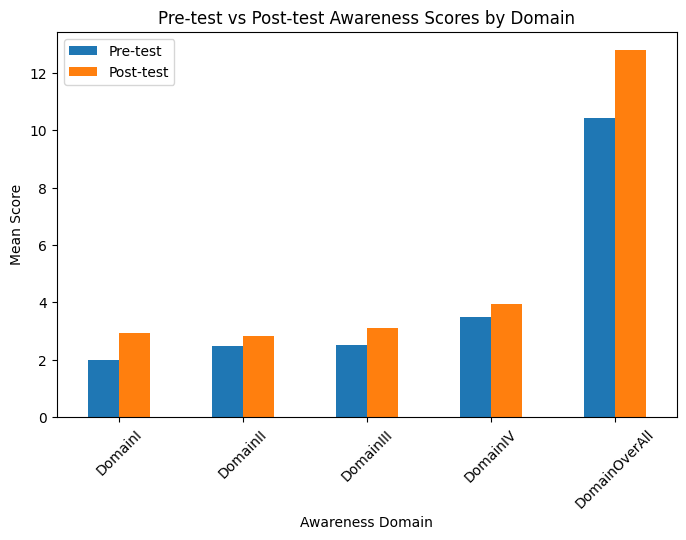

In [39]:
import matplotlib.pyplot as plt

# Create a bar chart comparing pre and post means
comparison[['Pre Mean', 'Post Mean']].plot(kind='bar', figsize=(8,5))
plt.title('Pre-test vs Post-test Awareness Scores by Domain')
plt.ylabel('Mean Score')
plt.xlabel('Awareness Domain')
plt.xticks(rotation=45)
plt.legend(['Pre-test', 'Post-test'])
plt.show()

In [41]:
# Step 5A: Create the paired dataset (students with both Pre & Post data)

# 1️⃣ Filter pre and post data to keep only students present in both
pre_paired = Pre_df[Pre_df['AutoID'].isin(common_ids)].copy()
post_paired = Post_df[Post_df['AutoID'].isin(common_ids)].copy()

# 2️⃣ Sort both datasets by AutoID to align them perfectly
pre_paired.sort_values(by='AutoID', inplace=True)
post_paired.sort_values(by='AutoID', inplace=True)

# 3️⃣ Reset index (optional, but tidy)
pre_paired.reset_index(drop=True, inplace=True)
post_paired.reset_index(drop=True, inplace=True)

# 4️⃣ Merge domain scores from pre and post side by side
paired_domains = pd.DataFrame({
    'AutoID': pre_paired['AutoID'],
    'DomainI_pre': pre_paired['DomainI'],
    'DomainI_post': post_paired['DomainI'],
    'DomainII_pre': pre_paired['DomainII'],
    'DomainII_post': post_paired['DomainII'],
    'DomainIII_pre': pre_paired['DomainIII'],
    'DomainIII_post': post_paired['DomainIII'],
    'DomainIV_pre': pre_paired['DomainIV'],
    'DomainIV_post': post_paired['DomainIV'],
    'DomainOverAll_pre': pre_paired['DomainOverAll'],
    'DomainOverAll_post': post_paired['DomainOverAll']
})

print("✅ Paired dataset created successfully.")
print("Total paired students:", len(paired_domains))
paired_domains.head()

✅ Paired dataset created successfully.
Total paired students: 1107


,AutoID,DomainI_pre,DomainI_post,DomainII_pre,DomainII_post,DomainIII_pre,DomainIII_post,DomainIV_pre,DomainIV_post,DomainOverAll_pre,DomainOverAll_post
0,1,2,3,1,4,4,3,4,4,11,14
1,2,3,4,4,4,3,2,4,4,14,14
2,3,1,3,2,4,1,3,5,4,9,14
3,4,2,4,3,2,3,3,4,5,12,14
4,5,2,3,4,4,3,3,4,4,13,14


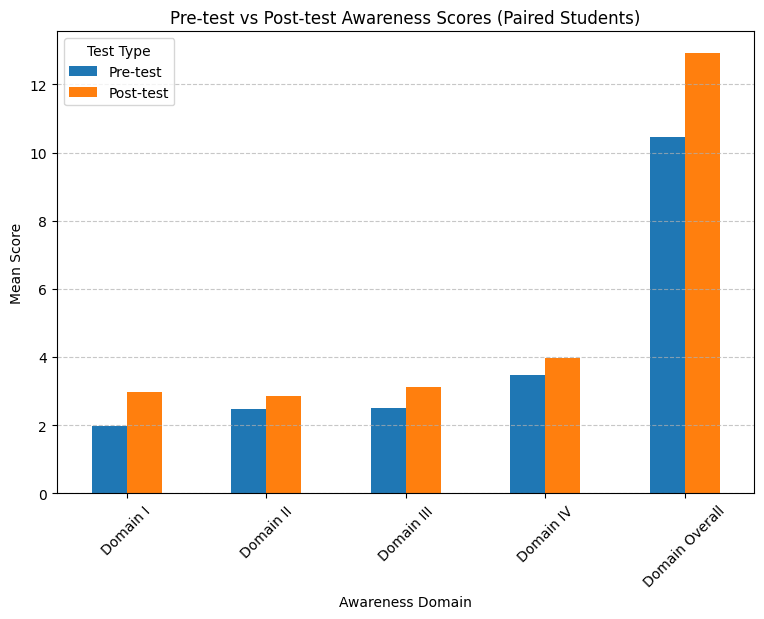

In [42]:
import matplotlib.pyplot as plt

# Compute pre and post means for the paired dataset
domain_means = {
    'Domain I': [paired_domains['DomainI_pre'].mean(), paired_domains['DomainI_post'].mean()],
    'Domain II': [paired_domains['DomainII_pre'].mean(), paired_domains['DomainII_post'].mean()],
    'Domain III': [paired_domains['DomainIII_pre'].mean(), paired_domains['DomainIII_post'].mean()],
    'Domain IV': [paired_domains['DomainIV_pre'].mean(), paired_domains['DomainIV_post'].mean()],
    'Domain Overall': [paired_domains['DomainOverAll_pre'].mean(), paired_domains['DomainOverAll_post'].mean()]
}

# Convert to DataFrame for easy plotting
domain_means_df = pd.DataFrame(domain_means, index=['Pre-test', 'Post-test']).T

# Create bar chart
domain_means_df.plot(kind='bar', figsize=(9,6))
plt.title('Pre-test vs Post-test Awareness Scores (Paired Students)')
plt.ylabel('Mean Score')
plt.xlabel('Awareness Domain')
plt.xticks(rotation=45)
plt.legend(title='Test Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

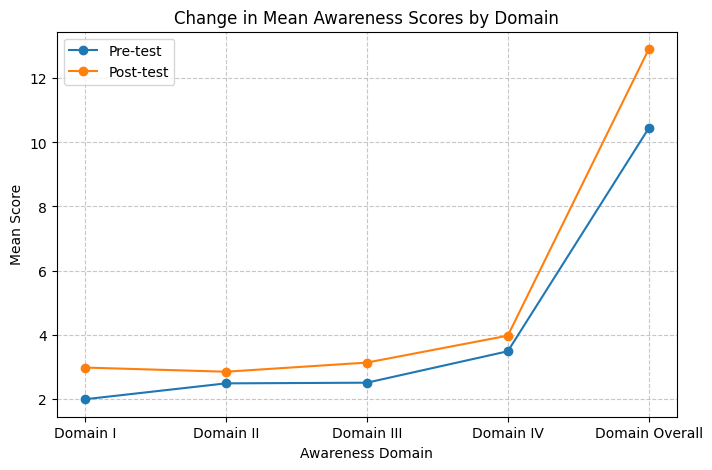

In [43]:
# Prepare data for line plot
plt.figure(figsize=(8,5))
plt.plot(domain_means_df.index, domain_means_df['Pre-test'], marker='o', label='Pre-test')
plt.plot(domain_means_df.index, domain_means_df['Post-test'], marker='o', label='Post-test')

plt.title('Change in Mean Awareness Scores by Domain')
plt.ylabel('Mean Score')
plt.xlabel('Awareness Domain')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [63]:
from scipy import stats

# Step 5B: Perform paired t-test for each awareness domain
domains = ['DomainI', 'DomainII', 'DomainIII', 'DomainIV', 'DomainOverAll']
t_test_results = []

for domain in domains:
    # Get pre and post columns
    pre_scores = paired_domains[f'{domain}_pre']
    post_scores = paired_domains[f'{domain}_post']

    # Run paired t-test
    t_stat, p_value = stats.ttest_rel(post_scores, pre_scores)  # order doesn't matter much, but post - pre is intuitive

    # Store results
    t_test_results.append({
        'Domain': domain,
        'Pre Mean': pre_scores.mean(),
        'Post Mean': post_scores.mean(),
        'Mean Difference': post_scores.mean() - pre_scores.mean(),
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert to DataFrame for display
t_test_df = pd.DataFrame(t_test_results)

# Add significance labels
t_test_df['Significance'] = t_test_df['p-value'].apply(lambda p: '✅ Significant (p<0.05)' if p < 0.05 else '❌ Not Significant')

# Display results neatly
print("Paired t-test Results:\n")
print(t_test_df[['Domain', 'Pre Mean', 'Post Mean', 'Mean Difference', 't-statistic', 'p-value', 'Significance']])

Paired t-test Results:

          Domain   Pre Mean  Post Mean  Mean Difference  t-statistic  \
0        DomainI   1.983740   2.971996         0.988257    29.174707   
1       DomainII   2.478771   2.841915         0.363144     7.166175   
2      DomainIII   2.499548   3.127371         0.627823    14.540109   
3       DomainIV   3.480578   3.967480         0.486902    10.034676   
4  DomainOverAll  10.442638  12.908762         2.466125    22.002263   

         p-value            Significance  
0  3.069388e-139  ✅ Significant (p<0.05)  
1   1.406361e-12  ✅ Significant (p<0.05)  
2   5.824516e-44  ✅ Significant (p<0.05)  
3   9.733602e-23  ✅ Significant (p<0.05)  
4   2.794194e-89  ✅ Significant (p<0.05)  


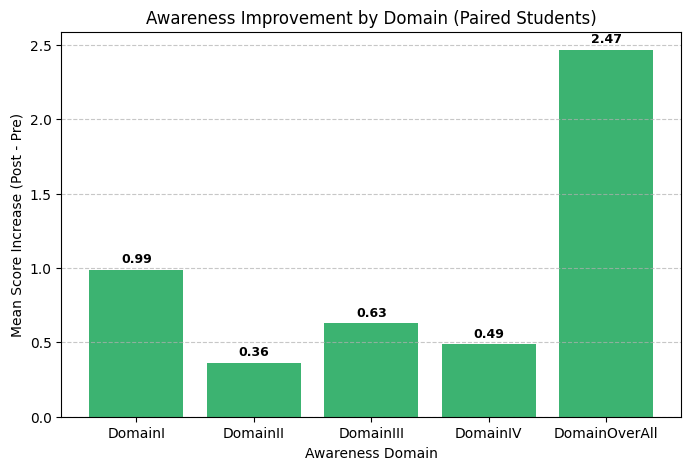

In [46]:
# Bar chart showing the mean difference (Post - Pre)
plt.figure(figsize=(8,5))
plt.bar(t_test_df['Domain'], t_test_df['Mean Difference'], color='mediumseagreen')
plt.title('Awareness Improvement by Domain (Paired Students)')
plt.ylabel('Mean Score Increase (Post - Pre)')
plt.xlabel('Awareness Domain')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the mean difference value
for i, diff in enumerate(t_test_df['Mean Difference']):
    plt.text(i, diff + 0.05, f"{diff:.2f}", ha='center', fontsize=9, fontweight='bold')

plt.show()

In [47]:
for col in ['DomainICat', 'DomainIICat', 'DomainIIICat', 'DomainIVCat', 'DomainOverAllCat']:
    print(f"{col} Pre-test categories:", Pre_df[col].unique())
    print(f"{col} Post-test categories:", Post_df[col].unique())
    print("-" * 50)

DomainICat Pre-test categories: ['Adequate' 'Inadequate']
DomainICat Post-test categories: ['Adequate' 'Inadequate']
--------------------------------------------------
DomainIICat Pre-test categories: ['Inadequate' 'Adequate']
DomainIICat Post-test categories: ['Adequate' 'Inadequate']
--------------------------------------------------
DomainIIICat Pre-test categories: ['Adequate' 'Inadequate']
DomainIIICat Post-test categories: ['Adequate' 'Inadequate']
--------------------------------------------------
DomainIVCat Pre-test categories: ['Adequate' 'Inadequate']
DomainIVCat Post-test categories: ['Adequate' 'Inadequate']
--------------------------------------------------
DomainOverAllCat Pre-test categories: ['Adequate' 'Inadequate']
DomainOverAllCat Post-test categories: ['Adequate' 'Inadequate']
--------------------------------------------------


In [59]:
# Step 6B.1: Count awareness categories in Pre and Post tests

domains_cat = ['DomainICat', 'DomainIICat', 'DomainIIICat', 'DomainIVCat', 'DomainOverAllCat']

for col in domains_cat:
    print(f"=== {col.replace('Cat', '')} Awareness Level Distribution ===")
    print("Pre-test:")
    print(Pre_df[col].value_counts(normalize=False))
    print("\nPre-test (%):")
    print(Pre_df[col].value_counts(normalize=True) * 100)
    print("\nPost-test:")
    print(Post_df[col].value_counts(normalize=False))
    print("\nPost-test (%):")
    print(Post_df[col].value_counts(normalize=True) * 100)
    print("-" * 60)

=== DomainI Awareness Level Distribution ===
Pre-test:
DomainICat
Adequate      808
Inadequate    299
Name: count, dtype: int64

Pre-test (%):
DomainICat
Adequate      72.990063
Inadequate    27.009937
Name: proportion, dtype: float64

Post-test:
DomainICat
Adequate      1204
Inadequate      72
Name: count, dtype: int64

Post-test (%):
DomainICat
Adequate      94.357367
Inadequate     5.642633
Name: proportion, dtype: float64
------------------------------------------------------------
=== DomainII Awareness Level Distribution ===
Pre-test:
DomainIICat
Adequate      863
Inadequate    244
Name: count, dtype: int64

Pre-test (%):
DomainIICat
Adequate      77.958446
Inadequate    22.041554
Name: proportion, dtype: float64

Post-test:
DomainIICat
Adequate      1112
Inadequate     164
Name: count, dtype: int64

Post-test (%):
DomainIICat
Adequate      87.147335
Inadequate    12.852665
Name: proportion, dtype: float64
------------------------------------------------------------
=== DomainIII

In [56]:
# Step 7A — Build a summary table

summary_df = pd.DataFrame({
    "Domain": ["Domain I", "Domain II", "Domain III", "Domain IV", "Overall"],
    "Pre-test Mean": [1.98, 2.48, 2.50, 3.48, 10.44],
    "Post-test Mean": [2.97, 2.84, 3.13, 3.97, 12.91],
    "Mean Difference": [0.99, 0.36, 0.63, 0.49, 2.47],
    "p-value": [3.07e-139, 1.41e-12, 5.82e-44, 9.73e-23, 2.79e-89],
    "Pre Adequate %": [72.99, 77.96, 81.84, 82.93, 79.13],
    "Post Adequate %": [94.36, 87.15, 89.26, 90.99, 92.32]
})

# Calculate % change in Adequate awareness
summary_df["% Increase in Adequate Awareness"] = summary_df["Post Adequate %"] - summary_df["Pre Adequate %"]

summary_df

,Domain,Pre-test Mean,Post-test Mean,Mean Difference,p-value,Pre Adequate %,Post Adequate %,% Increase in Adequate Awareness
0,Domain I,1.98,2.97,0.99,3.070000e-139,72.99,94.36,21.37
1,Domain II,2.48,2.84,0.36,1.410000e-12,77.96,87.15,9.19
2,Domain III,2.50,3.13,0.63,5.820000e-44,81.84,89.26,7.42
3,Domain IV,3.48,3.97,0.49,9.730000e-23,82.93,90.99,8.06
4,Overall,10.44,12.91,2.47,2.790000e-89,79.13,92.32,13.19


methods to manipulate the data.

1. create virtual environment and install necesarry items to work on data set. (pandas, numpy, openpyxl, ipykernel, seaborn, matplotlib)
2. import pandas as pd
3. create a variable file_path to store file path to data set.(You should now know:
How many students are in each dataset.
How many questions or variables are included.
What the general structure looks like.)
4. extract diffenrent worksheet from data set. 
5. What this tells us analytically

1️⃣ The data is balanced and consistent
→ Same structure and variable names across all three datasets.
→ This means you’ll be able to directly compare columns between Pretest and Post Test (e.g., Domain I pre vs post).

2️⃣ Slightly more students took the Post Test (1274 vs 1107)
→ Some students joined the study later or only participated after the awareness campaign.
→ We’ll treat this carefully in Step 2 (as you noticed earlier).

3️⃣ The CC Study dataset is mainly useful for auditing and record tracking
→ From here on, we’ll focus analysis on the two cleaned datasets:
pre_df
post_df

STEP 2
Next Step (Step 2): Compare participant IDs
Our goal now is to:
Identify how many students are common to both Pretest and Post Test.
Find how many are unique to each.
Check for any mismatches or duplicates.

This step tells you:
How many students’ data can be used for paired analysis (same student, both tests).
How many are only available for group-level comparisons (before vs after, different people).

Interpretation of your ID comparison results
Metric	Count	What It Means
Total Pre-test students	1,107	Students who took the awareness survey before the intervention.
Total Post-test students	1,276	Students who took the survey after the intervention (3 months later).
Students who took both tests	1,107	Every student who took the pre-test also took the post-test — 100% follow-up rate! 🙌
Students only in Pre-test	0	No one dropped out — excellent data integrity.
Students only in Post-test	169	New students joined later and only took the post-test.


STEP 3
Check age consistency for paired students
This will confirm that the pre and post records for each student match correctly.

What your result means
Metric	Count	% of total	What it suggests
Total students checked	1,107	100%	Students who took both pre and post tests
Matching ages	335	~30%	Age recorded the same at both time points
Different ages	772	~70%	Age value differs between pre and post
🧠 Interpretation

This tells us that for most students (772 out of 1,107), the age in the post-test doesn’t match the age in the pre-test.

That doesn’t mean the data is bad — it means one of the following happened:

✅ Possible reasons

Age was recorded differently
Students may have reported a different age (e.g., “15” vs “16”) if birthdays occurred in those 3 months or if they rounded differently.

Data entry errors
Manual entry (especially from paper forms) can lead to small inconsistencies.

Formatting or text issues
If some ages were recorded as strings (“fifteen”, “15 years”) or got cleaned differently, the numeric comparison can show false mismatches.

Misalignment of records
It’s possible, though less likely, that the AutoID doesn’t actually match the same student across pre and post datasets (for example, IDs reused or re-entered differently).


Summary of Your Findings
Age Difference	# of Students	What It Means
0	335	Reported the same age both times ✅
+1 / +2 / +3 / +4	352 total	Reported slightly older age — likely correct since the post-test was 3 months later
-1 / -2 / -3	420 total	Reported a younger age in the post-test — probably data entry or recall errors

So out of 1,107 students:

335 (30%) reported consistent ages

772 (70%) reported differences

About half are within ±1 year (normal)

Some show unrealistic changes (e.g. -3 or +4), which are likely input errors.

🧠 What this tells us

✅ The majority of mismatches are small (±1–2 years) — perfectly acceptable for educational awareness studies.
⚠️ A small portion (around 30–40 students) have unrealistic jumps (±3 or 4 years).

👉 This confirms your earlier insight that:

The data still represents the same individuals,

But age data is not perfectly reliable — and that’s okay.

You’ll simply note this as a data limitation in your report:

“Age values showed minor inconsistencies between pre- and post-tests, possibly due to self-reporting or entry errors. However, most differences were within ±1 year, supporting data reliability.”

Evaluating the two options
✅ Option A — Keep all 1,107 students

Pros:

Preserves your entire paired sample (maximum statistical power).

Reflects the true participation in the program.

Avoids throwing out valid students over small errors.

Best suited when the variable in question (age) is not central to your analysis.

Cons:

Slight inaccuracies in the “Age” column (but they don’t affect awareness scores).

You’ll need to note it in your “Data Limitations” section.

Use when:
→ You care about comparing pre vs post awareness, not about age-based analysis.

⚠️ Option B — Filter to ±2 years

Pros:

Ensures all remaining records are fully consistent.

Makes your data look a bit “cleaner.”

Cons:

You’ll lose roughly 40–50 records (those with ±3 or 4 years).

No real analytical benefit, because those age errors don’t affect awareness scores.

Adds unnecessary filtering for this kind of study.

Use when:
→ Age itself is a major variable of interest (e.g., “Does age affect awareness?”).

💡 Professional recommendation

👉 Go with Option A — keep all 1,107 students.

Why:

The inconsistencies are minor and expected in field-collected survey data.

You maintain a complete, powerful dataset.

Your analysis (awareness before vs after) remains perfectly valid.

It’s what experienced data analysts and public health researchers would do.

You’ll simply write in your report or dashboard:

“Minor inconsistencies were observed in reported ages between pre- and post-tests (mostly within ±2 years). Given the short study duration and non-age-dependent focus, all records were retained.”

STEP 4
Step 4A — Explore Demographic Variables

We’ll summarize and visualize:

Age distribution

Gender breakdown

SHS (class) distribution

Since both pre- and post-tests have the same students, we’ll use the pre-test dataset (pre_df) for demographics (to avoid duplicates).


What to look for in your results

Age summary:
Typical students should be between 14–20 years old.
If you see outliers (e.g., 5 or 50), we’ll handle them later.


SHS distribution:
Shows whether most participants came from SHS 1, 2, or 3 — helps explain maturity/awareness patterns.

Summary of Demographics (for your report or portfolio)

“The study involved 1,107 female students aged 14–18 years (Mean = 16.1). The majority were SHS 2 (38.7%) and SHS 3 (42.8%) students, suggesting the sample was composed mainly of mid- to upper-level senior high students — an appropriate target group for cervical cancer awareness interventions.”


step 4b

This will help us identify the exact names of your domain columns (they might be written differently — e.g., “Domain I”, “Domain_1”, “DomainI” etc.)

Here’s what we’ve just confirmed:

Observation	Pre-test	Post-test	Note
Awareness domain columns	✅ DomainI, DomainII, DomainIII, DomainIV, DomainOverAll	✅ Same names	Great — we can directly compare them
Category columns	✅ DomainICat, etc.	✅ Same names	We’ll use these in Step 4C (“Adequate” vs “Inadequate”)
Variable name formatting	Some minor differences (e.g., CC Cause vs CCCause)	Not an issue for our analysis since we’re focusing on domain score


step4b
Awareness Domain Comparison — Interpretation
Domain	Pre Mean	Post Mean	Mean Diff	What it represents	Interpretation
Domain I	1.98	2.92	+0.94	Basic knowledge about cervical cancer (causes, symptoms)	✅ Strong improvement — nearly +1 point gain
Domain II	2.48	2.83	+0.35	Knowledge about risk factors	⚠️ Moderate improvement — but smaller change, possibly due to prior knowledge
Domain III	2.50	3.09	+0.60	Knowledge about preventive behaviors	✅ Good improvement — students gained awareness of prevention
Domain IV	3.48	3.95	+0.47	Knowledge about screening and treatment	✅ Steady improvement — likely due to new information on Pap smear and HPV vaccine
Domain Overall	10.44	12.80	+2.35	Total awareness score (sum of all domains)	🌟 Substantial improvement overall — strong evidence that the intervention worked


What this means statistically

Every domain improved after the awareness session.

The largest gain occurred in Domain I (understanding what cervical cancer is).

The smallest gain was in Domain II — meaning students may already have had some knowledge about risk factors before the program.

The overall score rose by +2.35 points, which is a clear, measurable improvement in knowledge.

This is a very strong result — it tells a convincing story to a client, policymaker, or recruiter that your analysis demonstrates real-world impact.

